In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing

import tensorflow as tf
from tensorflow import keras
from keras import layers

# Descarga y carga de datos

In [2]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

feature_names = housing.feature_names

# Crear un DF

In [3]:
df = pd.DataFrame(X, columns=feature_names)

df['Price'] = y

# Primera exploración

In [4]:
print(f"Tamaño de el dataset{df.shape}")
print("\nInformación de las columnas:")
print(df.info())
print("\nEstadisticas descriptivas")
print(df.describe())

Tamaño de el dataset(20640, 9)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadisticas descriptivas
             MedInc      HouseAge  ...     Longitude         Price
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...  

para predecir el precio, se sabe que la target es una variable numerica continua, por esto es un problema de regresion, que exige que la target este normalizada para funcionar bien

Text(0, 0.5, 'Frecuencia')

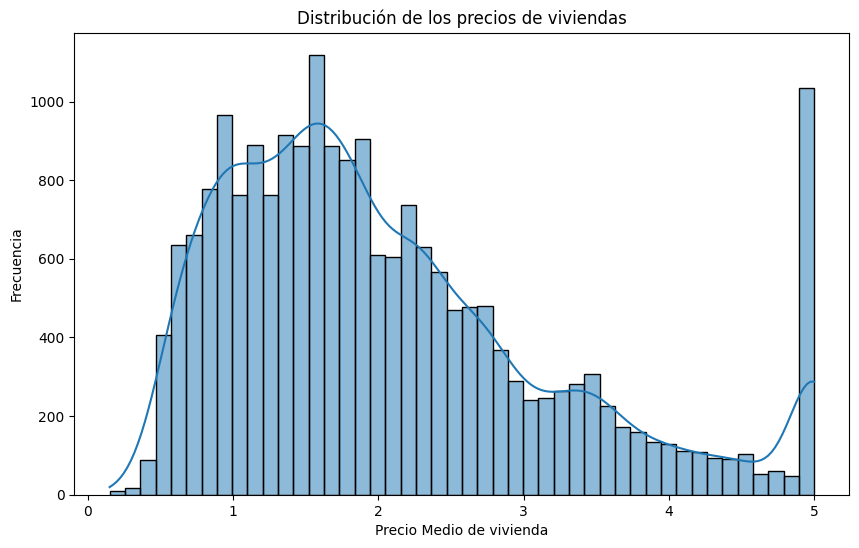

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title("Distribución de los precios de viviendas")
plt.xlabel("Precio Medio de vivienda")
plt.ylabel("Frecuencia")

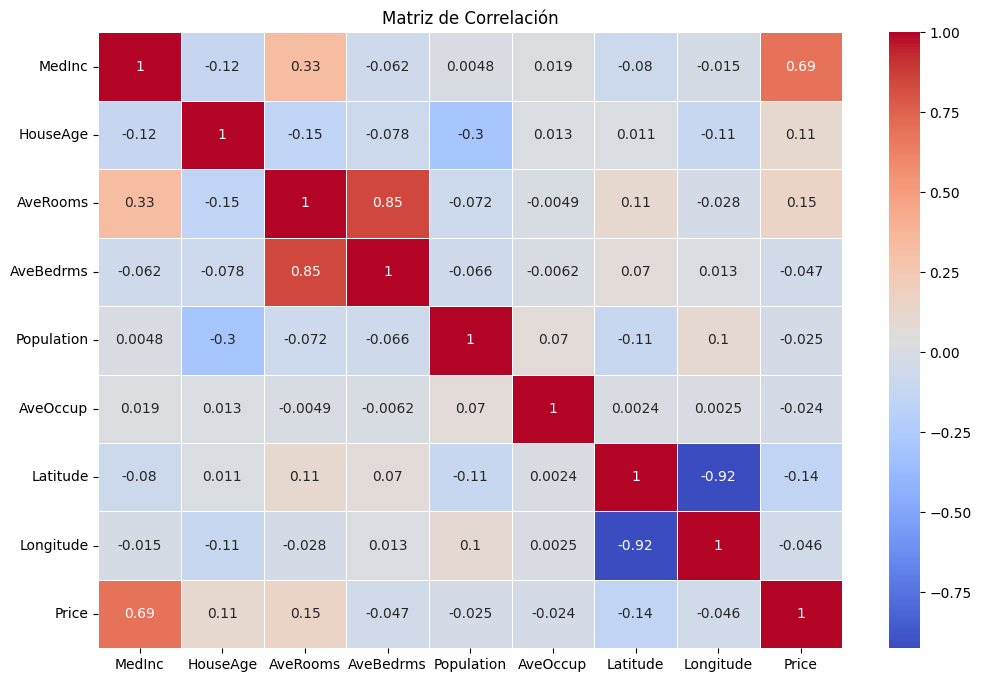

In [6]:
# Matriz de correlación
plt.figure(figsize=(12,8))
correlacion_matrix = df.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación");

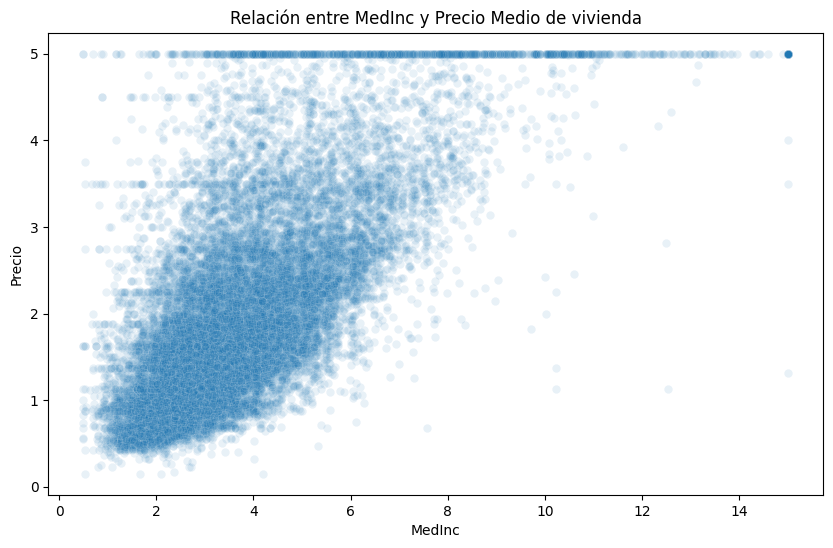

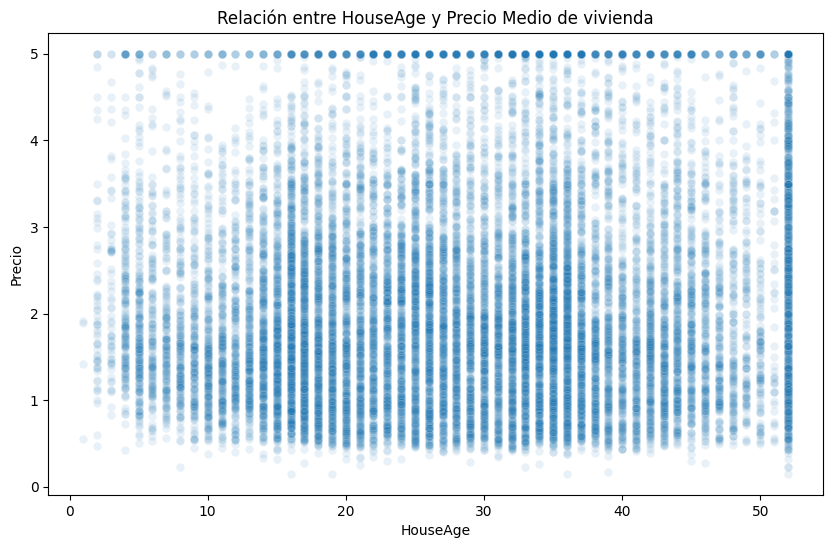

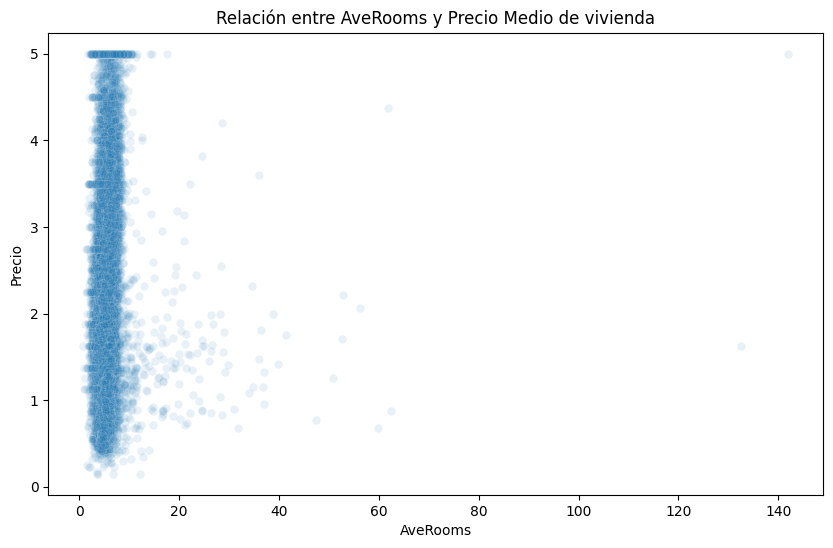

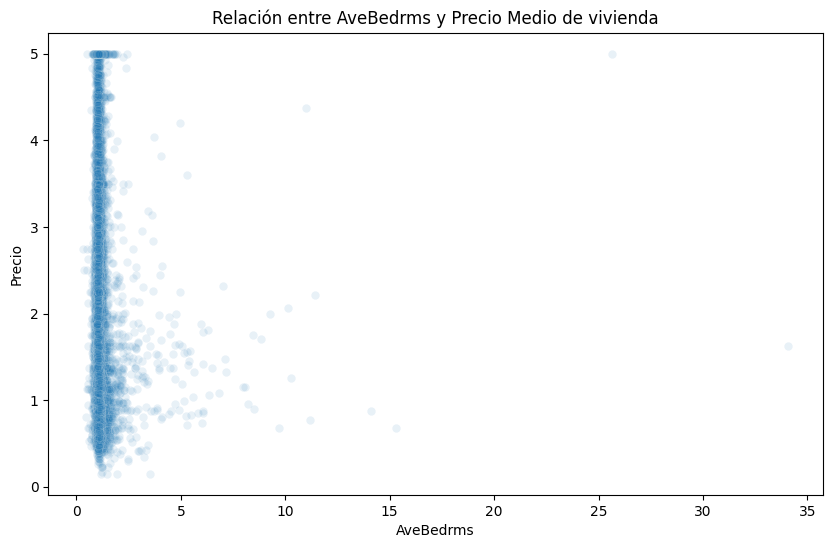

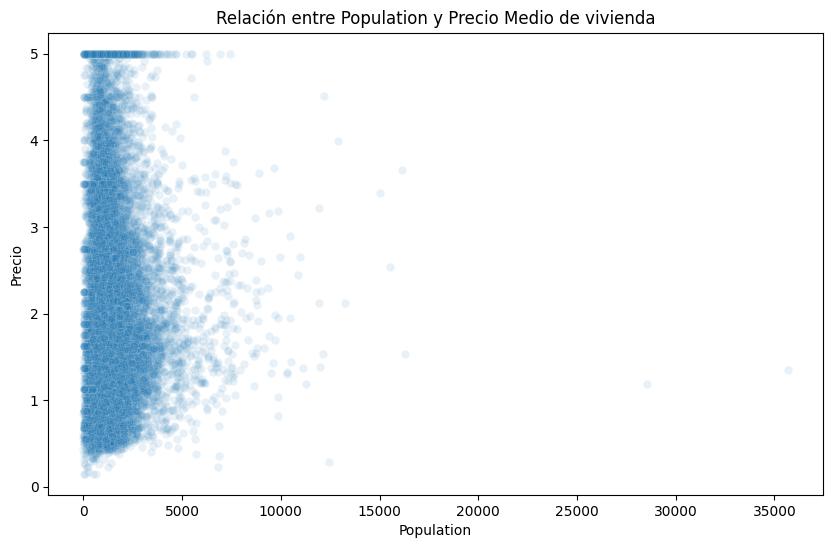

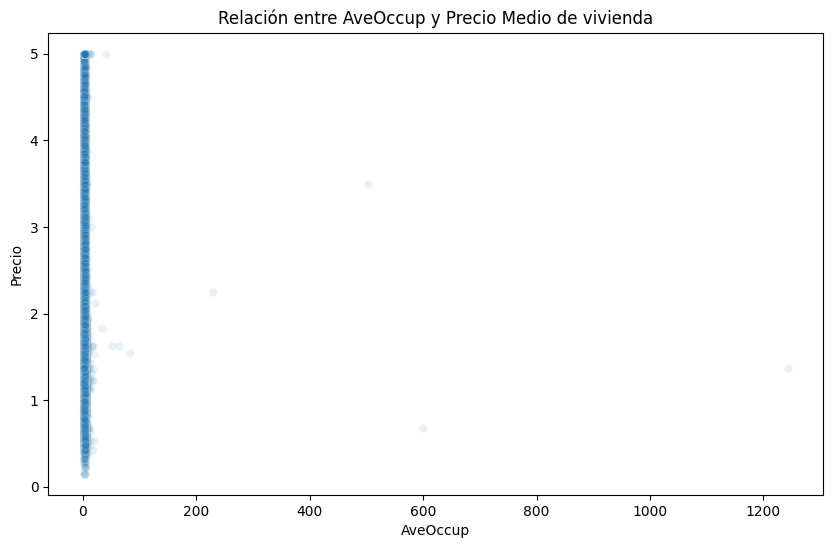

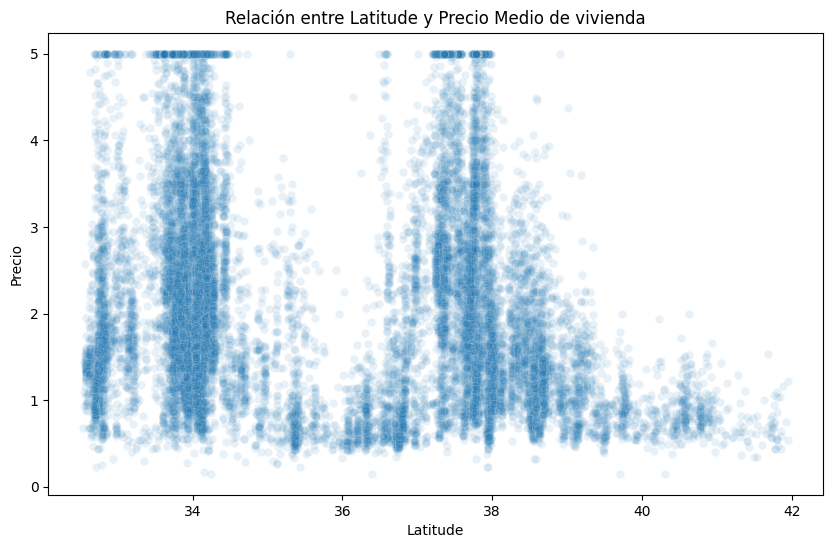

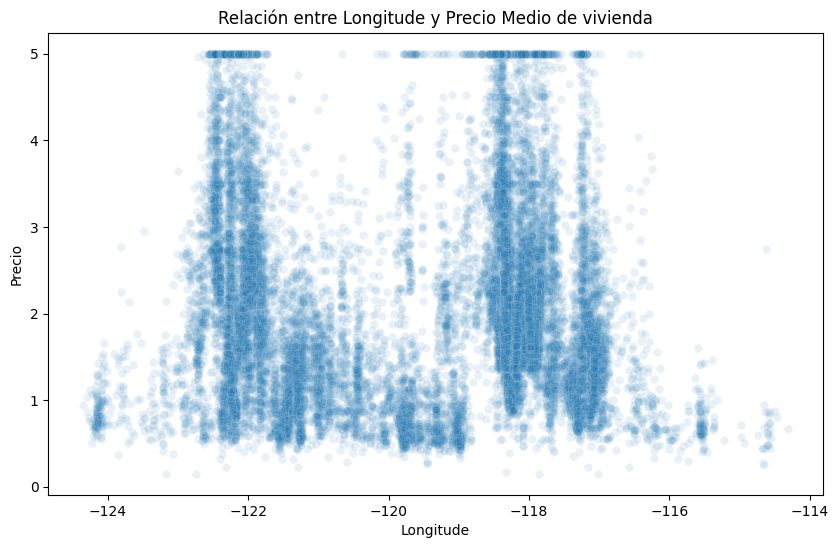

In [7]:
# Visualizaciones de relaciones entre features y Price

for feature in feature_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature], y=df['Price'], alpha=0.1)
    plt.xlabel(feature)
    plt.ylabel("Precio")
    plt.title(f"Relación entre {feature} y Precio Medio de vivienda")

## Preprocesado de datos

In [8]:
# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construir el modelo

In [9]:
def build_model(input_shape, learning_rate=0.001):
    model = keras.Sequential(
        [
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dropout(1)
        ]
    )

    optimizador = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizador,
        loss='mse',
        metrics=['mae']
    )

    return model

In [10]:
model = build_model(input_shape=X_train_scaled.shape[1])
model.summary()

c:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024\3-MachineLearning\7-DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,912 (50.44 KB)

 Trainable params: 12,464 (48.69 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Callback de entrenamiento

early_stopping = keras.callbacks.EarlyStopping(
    patience=30, #cuantos turnos pasa sin mejorar para la ejecución del modelo
    min_delta=0.001, #se no mejora este valor, o más que este valor, para la ejecución del modelo
    restore_best_weights=True,
    monitor='val_loss'
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor=0.2,
    patience=10,
    min_lr=0.00001,
    monitor='val_loss'
)

In [12]:
# Entrenar el modelo

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs = 300,
    batch_size = 32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/300


ValueError: Exception encountered when calling Dropout.call().

[1m`rate` must be a scalar tensor or a float in the range [0, 1). Received: rate=1[0m

Arguments received by Dropout.call():
  • inputs=tf.Tensor(shape=(None, 16), dtype=float32)
  • training=True

In [ ]:
test_mse, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error (MSE): {mse:.4f}")
print(f"Test Root Mean Absolute Error (MAE): {rmse:.4f}")
print(f"Test Mean Absolute Percentage Error (MAE): {mape:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")
print(f"Test R-squared: {R2:.4f}")


ValueError: Dimensions must be equal, but are 32 and 16 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, sequential_1/dense_3_1/Relu)' with input shapes: [32], [32,16].

NameError: name 'history' is not defined

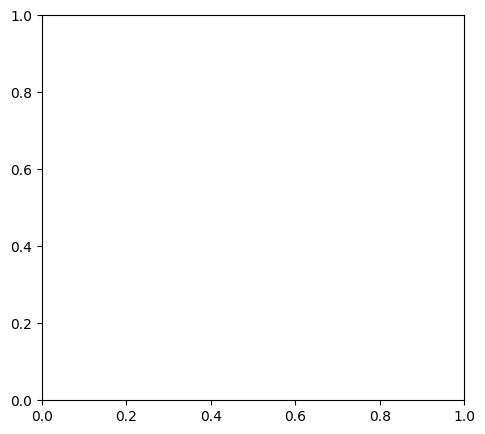

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Entrenamiento')
plt.plot(history.history['val_loss'],label='Validación')
plt.title('Pérdida (loss) durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend();

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[[y_pred.min(),y_pred.max()]], color='r')
plt.xlabel("Precios reales(100.000)")
plt.ylabel("Predicciones ($100.000)")
plt.title("Predicciones vs Valores Reales")
plt.grid(True)
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
residuos = y_test - y_pred.flatten()

plt.figure(figsize=(10,6))

plt.scatter(y_pred, residuos, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(residuos,kde=True)
plt.title("Distribucion de Residuos")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid()
plt.show();

NameError: name 'residuos' is not defined

<Figure size 1000x600 with 0 Axes>

Los residuos tienen que ser normales/aparentemente normales, esto significa que el modelo está yendo por un buen camino

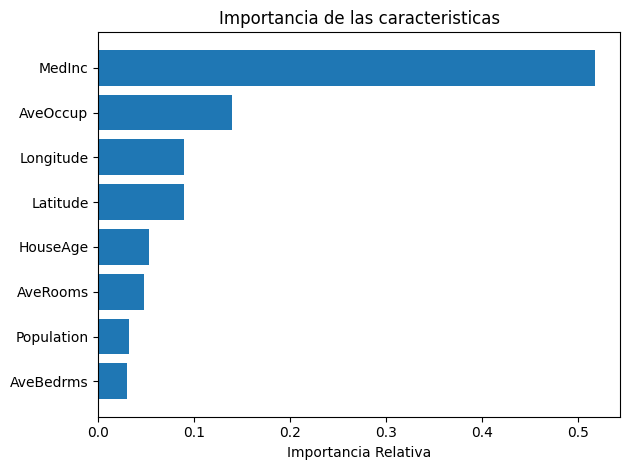

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=73)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_

indices = np.argsort(importances)

plt.Figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importancia Relativa")
plt.title("Importancia de las caracteristicas")

plt.tight_layout()
plt.show();